## Исследование коннектомов с помощью вычисления геометрических характеристик
### A Study of Connectomes by Calculating Geometric Characteristics

### Источники: 
1.	Farooq H., Chen Y., Tryphon T.G., Tannenbaum A., Lenglet C. Network Curvature as a Hallmark of Brain Structural Connectivity
2.	Liu S. Synthetic notions of curvature and applications in graph theory
3.	Peyerimhoff, N. Curvature notions on graphs. Leeds summer school

In [2]:
import numpy as np

## Теоретическая часть из [2]

Пусть $G = (V, E)$ - связный неориентированный взвешенный граф. Наличие петель не исключено. Граф (локально) конечен, то есть конечно количество ребер, выходящих из каждой вершины. Степень вершины $d_x$ определяется как $\sum_{y \in V} w_{xy}$ для каждой из вершин $x \in V$.

Кривизна Оливье-Риччи определяется в метрическом пространстве $(X, d)$, где каждой точке $x \in X$ соответствует вероятностная мера $m_x(\cdot)$. Эта структура обозначается как $(X, d, m)$. Но нам достаточно использовать $(V, d, m)$, где $V$ --- множество вершин графа.

Для (локально) конечного графа $G = (V, E)$ определим метрику $d$ на множестве вершин $V$ следующим образом. Для соседних вершин $x, y$, $d(x, y) = 1$. Для различных вершин $x, y$, $d(x, y)$ есть длина кратчайшего пути в графе между ними (количество ребер). Каждой вершине присвоим вероятностную меру $$m_x(y) = \begin{cases} \frac{w_{xy}}{d_x}, \text{ если } y \sim x; \\ 0, \text{ иначе.} \end{cases}$$

Интуитивным представлением может быть random walker, который изначально находится в $x$, а затем выбирает между соседями $x$ с одинаковой вероятностью $\frac{w_{xy}}{d_x}$. 

**Определение.** (Оливье). На $(X, d, m)$ для двух различных точек $x, y \in X$ кривизна (Оливье-)Риччи по $(xy)$ определяется как $$\kappa(x, y) = 1 - \frac{W_1(m_x, m_y)}{d(x, y)}.$$ 

**Замечание.** Перечислим несколько базовых наблюдений о кривизне:
* $\kappa(x, y) \leq 1$
* Определение можно переписать следующим образом: $W_1(m_x, m_y) = d(x, y)(1 - \kappa(x, y))$
* Если $k$ --- нижняя грань $\kappa(x,y)$, то есть $\kappa(x, y) \geq k$, то из этого следует неравенство $W_1(m_x, m_y) \leq (1-k)d(x, y)$.




### Программа-аналог, описанная в [3]
находится по ссылке: http://www.maths.dur.ac.uk/~dma0np/epsrc2013/software/david_cushing_2/graphcurv.html

Отличается тем, что находит много видов кривизны, но, видимо, только по графам, которые юзер рисует, а матрицу загрузить некуда. Веса, судя по интерфейсу и help, тоже не задаются, все подсчеты по матрице смежности из 0 и 1.

### TODO: 
Что нужно сделать – реализовать вычисление кривизны графа двумя способами:

a) если матрица инцидентности задана с действительными весами, и мы ее такой оставляем

b) если значения округляются (от 0,65 типа ребро есть, ставим 1, иначе 0).

### 1. Чтение матрицы инцидентности графа

In [3]:
# вариант с чтением из консоли, для тестирования наглядно
N = int(input("Введите количество вершин в графе: ")) # размер матрицы

M = np.zeros(shape = (N, N), dtype = float)
nums = list(map(float, input().split()))
for i in range(N):
    for j in range(N):
        M[i][j] = nums[i * N + j]
print(M)

Введите количество вершин в графе: 0
0
[]


In [83]:
# вариант с файловым вводом, для бОльших данных
# Пока что взяла просто какую-то симметричную матрицу небольшого размера, чтобы смотреть, как работают методы.
file = open("data.txt", "r")
data = []
for line in file:
    nums = list(map(float, line.split()))
    data.append(nums)

M = np.array(data)
N = M.shape[0]
print(M)

[[0.1  0.2  0.3  0.4  0.5 ]
 [0.2  0.6  0.7  0.2  1.  ]
 [0.3  0.7  0.   0.4  0.3 ]
 [0.4  0.2  0.4  0.5  0.7 ]
 [0.5  1.   0.3  0.7  0.57]]


Округлим значения в матрице: для значений, не меньших 0.65, поменяем на 1, иначе оставим 0.

In [5]:
M_rounded = np.zeros(shape = (N, N), dtype = float)
for i in range(N):
    for j in range(N):
        if M[i][j] >= 0.65:
            M_rounded[i][j] = 1
print(M_rounded)

[[0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]]


### 2. Вычислим кривизну Оливье-Риччи:


Метод для вычисления степени вершины по формуле (параметры - матрица, ее размер и номер вершины от 1 до $N$):
    $$d_x = \sum_{y \in V} w_{xy}$$
    
Эта же величина называется *node strength* в [1].

In [47]:
print(M)

[[0. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


In [5]:
def degree(M, index):
    N = M.shape[0]
    d = 0.0
    for j in range(N):
        d += M[index][j]
    return d

In [6]:
for i in range(5):
    print(degree(M, i))

6.0
2.0
2.0
1.0
1.0


Метод для вычисления попарных расстояний $d(x, y)$ между вершинами графа. Используется алгоритм Флойда. Граф должен быть без петель (это надо уточнить). Должно хватать замены диагональных элементов на нули, так как петля с положительным расстоянием не может повлиять на кратчайший путь (очевидно?)

In [7]:
def distances(M):
    N = M.shape[0]
    # подготовка матрицы
    d = np.array(M)
    for i in range(N):
        for j in range(N):
            if d[i][j] != 0:
                d[i][j] = 1
            else:
                d[i][j] = np.inf
        d[i][i] = 0
    for k in range(N):
        for i in range(N):
            for j in range(N):
                d[i][j] = min(d[i][j], d[i][k] + d[k][j])
    return d

In [8]:
def distances_w(M):
    N = M.shape[0]
    # подготовка матрицы
    d = np.array(M)
    for i in range(N):
        for j in range(N):
            if d[i][j] == 0:
                d[i][j] = np.inf
        d[i][i] = 0
    for k in range(N):
        for i in range(N):
            for j in range(N):
                d[i][j] = min(d[i][j], d[i][k] + d[k][j])
    return d

In [9]:
d = distances_w(M)
d

array([[0., 1., 1., 1., 1., 1., 1., 2., 2.],
       [1., 0., 1., 2., 2., 2., 2., 3., 3.],
       [1., 1., 0., 2., 2., 2., 2., 3., 3.],
       [1., 2., 2., 0., 2., 2., 2., 3., 3.],
       [1., 2., 2., 2., 0., 2., 2., 3., 3.],
       [1., 2., 2., 2., 2., 0., 2., 1., 1.],
       [1., 2., 2., 2., 2., 2., 0., 3., 3.],
       [2., 3., 3., 3., 3., 1., 3., 0., 2.],
       [2., 3., 3., 3., 3., 1., 3., 2., 0.]])

In [10]:
M # проверка, что матрица не меняется после применения методов

array([[0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]])

Метод для вычисления $m_x(y)$. Случай, когда вершины не соединены, не нужно рассматривать отдельно, так как граф связный, то есть это равносильно тому, что получится 0 в числителе дроби, а значит и все ее значение будет 0, что соответствует определению.

In [11]:
def get_m(M):
    N = M.shape[0]
    M_1 = np.zeros(shape = (N, N), dtype = float)
    for i in range(N):
        d = degree(M, i)
        for j in range(N):
            if M[i][j] != 0:
                M_1[i][j] = M[i][j] / d
            else:
                M_1[i][j] = 0
    return M_1

In [12]:
m = get_m(M)
m

array([[0.        , 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.16666667, 0.        , 0.        ],
       [0.5       , 0.        , 0.5       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33333333, 0.33333333],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ],


Метод для вычисления кривизны графа:
кривизна (Оливье-)Риччи по $(xy)$ определяется как $$\kappa(x, y) = 1 - \frac{W_1(m_x, m_y)}{d(x, y)}.$$ 
Проверка на наличие ребра не нужна, т.к. в связном графе все расстояния $d(x, y)$ получаются больше 0.

$W_1$ - "транспортное" расстояние (Вассерштейна), см. *Optimal transport problem*, но можно просто взять библиотечную функцию.

In [13]:
from scipy.stats import wasserstein_distance as w1

In [77]:
def curvature(M):
    N = M.shape[0]
    m = get_m(M)
    d = distances(M)
    K = np.zeros(shape = (N, N), dtype = float)
    arr = [1 for i in range(N)]
    arr0 = [0 for i in range(N)]
    for i in range(N):
        for j in range(N):
            if M[i][j] != 0 and i != j:
                K[i][j] = 1 - (w1(arr0, arr, m[i], m[j])) / d[i][j]
                print(i, j, m[i], m[j], d[i][j], w1(arr0, arr, m[i], m[j]))
            
    return K

In [78]:
K = curvature(M)
K

0 1 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ] 1.0 1.0
0 2 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.5 0.5 0.  0.  0.  0.  0.  0.  0. ] 1.0 1.0
0 3 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
0 4 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
0 5 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.33333333 0.         0.         0.         0.         0.
 0.         0.33333333 0.33333333] 1.0 1.0
0 6 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
1 0 [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ] [0.         0.166

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

(Скалярная) кривизна вершины (*(scalar) node curvature*) определяется в [1] как сумма значений кривизны всех ребер, выходящих из нее: $$\kappa_x = \sum_{y \in V} \kappa(x, y)$$

Опять же, проверка на наличие ребра в методе пропущена, т.к. кривизна у отсутствующего ребра равна 0.

In [16]:
def node_curvature(M, index):
    N = M.shape[0]
    K = curvature(M)
    cur = 0.0
    for i in range(N):
        if i != index:
            cur += K[index][i]
            
    return cur

In [17]:
c = node_curvature(M, 3)
c

[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ] 1.0 0.14814814814814814
0.14814814814814814
[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.5 0.5 0.  0.  0.  0.  0.  0.  0. ] 1.0 0.14814814814814814
0.14814814814814814
[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 0.18518518518518523
0.18518518518518523
[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 0.18518518518518523
0.18518518518518523
[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.33333333 0.         0.         0.         0.         0.
 0.         0.33333333 0.33333333] 1.0 0.1111111111111111
0.1111111111111111
[0.         0.16666667 0.16666667 0.16666667

0.8148148148148148

Также в [1] отмечают, что может рассматриваться еще и "взвешенная" версия определения кривизны в вершине, а именно 
$$\bar{\kappa}_x =  \sum_{y \in V} \frac{w_{xy}}{d_x} \kappa(x, y)$$

Посчитаю и ее

In [18]:
def node_curvature_weighted(M, index):
    N = M.shape[0]
    K = curvature(M)
    d = degree(M, index)
    cur = 0.0
    for i in range(N):
        if i != index:
            cur += K[index][i]
    cur = cur * (M[index][i] / d)
    return cur

In [19]:
c = node_curvature_weighted(M, 3)
c

[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ] 1.0 0.14814814814814814
0.14814814814814814
[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.5 0.5 0.  0.  0.  0.  0.  0.  0. ] 1.0 0.14814814814814814
0.14814814814814814
[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 0.18518518518518523
0.18518518518518523
[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 0.18518518518518523
0.18518518518518523
[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.33333333 0.         0.         0.         0.         0.
 0.         0.33333333 0.33333333] 1.0 0.1111111111111111
0.1111111111111111
[0.         0.16666667 0.16666667 0.16666667

0.0

В [1] и [2] также упоминается понятие *local clustering coefficient* - коэффициент кластеризации, выражающий степень связанности между собой соседних с данной вершин. Он вычисляется как частное ребер, соединяющих соседей вершины, и максимального их количества.

$$ c(x) = \frac{\text{number of edges between neighbors of } x}{\text{number of possible existing edges between neighbors of } x } = \frac{1}{d_x(d_x - 1)} \sum_{y, y\sim x} \#(x, y) $$

In [20]:
def lcc(M, index):
    N = M.shape[0]
    e = 0
    neigh = []
    for i in range(N):
        if i != index and M[index][i] != 0:
            neigh.append(i)
    for x in neigh:
        for y in neigh:
            if x != y and M[x][y] != 0:
                e += 1
    print(e)
    print(len(neigh))
    return e / ((len(neigh) - 1) * len(neigh))

In [21]:
coef = lcc(M, 3)
coef

0
1


ZeroDivisionError: division by zero

### Curvature with idleness

В [3] дается определение кривизны Оливье-Риччи с параметром $p$ бездействия (*idleness*):
$$ \kappa_p (x, y) = 1 - \frac{W_1(m_x^p, m_y^p)}{d(x, y)}, $$
где $$m_x^p(y) = \begin{cases} p, \text{ если } x = y, \\ \frac{1 - p}{|x|}, \text{ если } x \sim y, \\ 0 \text{ иначе.}\end{cases}, $$ а $|x|$ обозначает степень вершины $x$, равную количеству выходящих из нее ребер (в отличие от $d_x$, которая зависит от весов ребер).

Чтобы вычислять такую кривизну, придется пересчитать степени вершины и вероятностную меру $m_x ^ p$.

#### Откуда все это берется?

Для определения кривизны Оливье-Риччи были введены вероятностные меры, представляющие (метрические) шары вокруг вершин графа. Эти шары должны быть маленькими, но не тривиальными (т.е. радиусы -- небольшие положительные числа). Так как расстояния выражены целыми числами (считаются по количеству ребер), то выбирается радиус 1, что означает, что шар содержит саму центральную вершину $x\in V$, а также всех ее соседей $y \in V \, : \, y \sim x$. Тогда множество задействованных вершин обозначается как $B_1(x) = \{ y \in V \, | \, d(x, y) \leq 1 \}$. Чтобы разрешить некоторую "гибкость" в связанной с $B_1(x)$ вероятностной мерой, введем параметр $p \in [0, 1]$, который равен вероятности в центре, для каждой из соседних вершин тогда получим веростность $\frac{1 - p}{|x|}$. Эти вероятности могут рассматриваться как вероятности перехода из вершины $x$ в случайном блуждании, и тогда $p$ - вероятность, что перехода не было. Поэтому он называется *idleness parameter*.

In [22]:
def degree_p(M, index):
    N = M.shape[0]
    d = 0.0
    for j in range(N):
        if M[index][j] > 0:
            d += 1
    return d

In [23]:
def get_m_p(M, p):
    N = M.shape[0]
    M_1 = np.zeros(shape = (N, N), dtype = float)
    for i in range(N):
        d = degree_p(M, i)
        for j in range(N):
            if i == j:
                M_1[i][j] = p
            elif M[i][j] != 0:
                M_1[i][j] = (1 - p) / d
            else:
                M_1[i][j] = 0
    return M_1

In [24]:
def curvature_with_idleness(M, p=0):
    N = M.shape[0]
    m = get_m_p(M, p)
    d = distances(M)
    K = np.zeros(shape = (N, N), dtype = float)
    for i in range(N):
        for j in range(N):
            if i != j:
                K[i][j] = 1 - (w1(m[i], m[j]) / d[i][j])
            
    return K
    

In [25]:
K = curvature_with_idleness(M)
K

array([[0.        , 0.85185185, 0.85185185, 0.81481481, 0.81481481,
        0.88888889, 0.81481481, 0.90740741, 0.90740741],
       [0.85185185, 0.        , 1.        , 0.94444444, 0.94444444,
        0.96296296, 0.94444444, 0.96296296, 0.96296296],
       [0.85185185, 1.        , 0.        , 0.94444444, 0.94444444,
        0.96296296, 0.94444444, 0.96296296, 0.96296296],
       [0.81481481, 0.94444444, 0.94444444, 0.        , 1.        ,
        0.92592593, 1.        , 1.        , 1.        ],
       [0.81481481, 0.94444444, 0.94444444, 1.        , 0.        ,
        0.92592593, 1.        , 1.        , 1.        ],
       [0.88888889, 0.96296296, 0.96296296, 0.92592593, 0.92592593,
        0.        , 0.92592593, 0.85185185, 0.85185185],
       [0.81481481, 0.94444444, 0.94444444, 1.        , 1.        ,
        0.92592593, 0.        , 1.        , 1.        ],
       [0.90740741, 0.96296296, 0.96296296, 1.        , 1.        ,
        0.85185185, 1.        , 0.        , 1.        ],


In [26]:
K = curvature_with_idleness(M, 0.01)
K

array([[0.        , 0.85333333, 0.85333333, 0.81666667, 0.81666667,
        0.89      , 0.81666667, 0.90833333, 0.90833333],
       [0.85333333, 0.        , 1.        , 0.945     , 0.945     ,
        0.96333333, 0.945     , 0.96333333, 0.96333333],
       [0.85333333, 1.        , 0.        , 0.945     , 0.945     ,
        0.96333333, 0.945     , 0.96333333, 0.96333333],
       [0.81666667, 0.945     , 0.945     , 0.        , 1.        ,
        0.92666667, 1.        , 1.        , 1.        ],
       [0.81666667, 0.945     , 0.945     , 1.        , 0.        ,
        0.92666667, 1.        , 1.        , 1.        ],
       [0.89      , 0.96333333, 0.96333333, 0.92666667, 0.92666667,
        0.        , 0.92666667, 0.85333333, 0.85333333],
       [0.81666667, 0.945     , 0.945     , 1.        , 1.        ,
        0.92666667, 0.        , 1.        , 1.        ],
       [0.90833333, 0.96333333, 0.96333333, 1.        , 1.        ,
        0.85333333, 1.        , 0.        , 1.        ],


In [27]:
def node_curvature_with_idleness(M, p, index):
    N = M.shape[0]
    K = curvature_with_idleness(M, p)
    cur = 0.0
    for i in range(N):
        if i != index:
            cur += K[index][i]
            
    return cur

### Graph curvature

#### Кривизной целого графа назовем сумму кривизны по вершинам.

In [124]:
def graph_curvature(M):
    N = M.shape[0]
    cur = 0
    for i in range(N):
        cur += node_curvature(M, i)
    return cur


In [125]:
graph_curvature(M)

[0.  0.5 0.5 0.  0. ]
[0.33333333 0.         0.33333333 0.33333333 0.        ]
0.13333333333333333
[0.  0.5 0.5 0.  0. ]
[0.5 0.5 0.  0.  0. ]
0.0
[0.33333333 0.         0.33333333 0.33333333 0.        ]
[0.  0.5 0.5 0.  0. ]
0.13333333333333333
[0.33333333 0.         0.33333333 0.33333333 0.        ]
[0.5 0.5 0.  0.  0. ]
0.13333333333333333
[0.33333333 0.         0.33333333 0.33333333 0.        ]
[0.  0.5 0.  0.  0.5]
0.13333333333333333
[0.5 0.5 0.  0.  0. ]
[0.  0.5 0.5 0.  0. ]
0.0
[0.5 0.5 0.  0.  0. ]
[0.33333333 0.         0.33333333 0.33333333 0.        ]
0.13333333333333333
[0.  0.5 0.  0.  0.5]
[0.33333333 0.         0.33333333 0.33333333 0.        ]
0.13333333333333333
[0.  0.5 0.  0.  0.5]
[0. 0. 0. 1. 0.]
0.2
[0. 0. 0. 1. 0.]
[0.  0.5 0.  0.  0.5]
0.2
[0.  0.5 0.5 0.  0. ]
[0.33333333 0.         0.33333333 0.33333333 0.        ]
0.13333333333333333
[0.  0.5 0.5 0.  0. ]
[0.5 0.5 0.  0.  0. ]
0.0
[0.33333333 0.         0.33333333 0.33333333 0.        ]
[0.  0.5 0.5 0.  0. 

8.8

In [28]:
def graph_curvature_with_idleness(M, p):
    N = M.shape[0]
    cur = 0
    for i in range(N):
        cur += node_curvature_with_idleness(M, p, i)
    return cur


In [29]:
graph_curvature_with_idleness(M, 0.5)

69.77777777777779

In [30]:
graph_curvature_with_idleness(M, 0.8)

71.11111111111111

In [31]:
graph_curvature_with_idleness(M, 0.1)

68.0

In [32]:
graph_curvature_with_idleness(M, 0)

67.55555555555556

### Отрисовка графов

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

In [64]:
def draw_graph(M):
    N = M.shape[0]
    plt.figure(figsize=(min(N, 20),min(N, 20)))
    G = nx.Graph()
    labels = {}
    for i in range(N):
        labels[i] = (str(i + 1))
    G.add_nodes_from([i for i in range(0, N)])
    for i in range(0, N):
        for j in range(i, N):
            if M[i][j] != 0:
                G.add_edge(i, j, weight = M[i][j])
    pos = nx.spring_layout(G)
    K = curvature(M)
    for i in range(0, N):
        cur = node_curvature(M, i)
        if cur > 0:
            nx.draw_networkx_nodes(G, pos,
                       nodelist=[i],
                       node_color='r',
                       node_size=500,
                       alpha=1)
        elif cur < 0:
            nx.draw_networkx_nodes(G, pos,
                       nodelist=[i],
                       node_color='b',
                       node_size=500,
                       alpha=0.8)
        else:
            nx.draw_networkx_nodes(G, pos,
                       nodelist=[i],
                       node_size=500,
                       alpha=0.8)
        for j in range(i, N):
            cur = K[i][j]
            if M[i][j] != 0 and i != j:
                if cur > 0:
                    nx.draw_networkx_edges(G, pos, edgelist = [(i, j)], alpha=0.5, edge_color = 'r')
                    edge_labels = {(i, j) : str(cur)[:4]}
                    print(i, j)
                    nx.draw_networkx_edge_labels(G, pos, edge_labels)
                elif cur < 0:
                    nx.draw_networkx_edges(G, pos, edgelist = [(i, j)], alpha=0.5, edge_color = 'b')
                    edge_labels = {(i, j) : str(cur)[:5]}
                    print(i, j)
                    nx.draw_networkx_edge_labels(G, pos, edge_labels)
                else:
                    nx.draw_networkx_edges(G, pos, edgelist = [(i, j)], alpha=0.5)
                    edge_labels = {(i, j) : '0'}
                    print(i, j)
                    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    nx.draw_networkx_labels(G, pos, labels, font_size=16)
    plt.axis('off')
    plt.show()

0 1 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ] 1.0 1.0
0 2 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.5 0.5 0.  0.  0.  0.  0.  0.  0. ] 1.0 1.0
0 3 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
0 4 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
0 5 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.33333333 0.         0.         0.         0.         0.
 0.         0.33333333 0.33333333] 1.0 1.0
0 6 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
1 0 [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ] [0.         0.166

0 5 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.33333333 0.         0.         0.         0.         0.
 0.         0.33333333 0.33333333] 1.0 1.0
0 6 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
1 0 [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ] [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] 1.0 1.0
1 2 [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ] [0.5 0.5 0.  0.  0.  0.  0.  0.  0. ] 1.0 1.0
2 0 [0.5 0.5 0.  0.  0.  0.  0.  0.  0. ] [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] 1.0 1.0
2 1 [0.5 0.5 0.  0.  0.  0.  0.  0.  0. ] [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ] 1.0 1.0
3 0 [1. 0. 0. 0. 0. 0. 0. 0. 0.] [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] 1.0 1.0
4 0 [1. 0. 0. 0. 0. 0. 0. 

8 5 [0. 0. 0. 0. 0. 1. 0. 0. 0.] [0.33333333 0.         0.         0.         0.         0.
 0.         0.33333333 0.33333333] 1.0 1.0
0 1 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ] 1.0 1.0
0 2 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.5 0.5 0.  0.  0.  0.  0.  0.  0. ] 1.0 1.0
0 3 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
0 4 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
0 5 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.33333333 0.         0.         0.         0.         0.
 0.         0.33333333 0.33333333] 1.0 1.0
0 6 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666

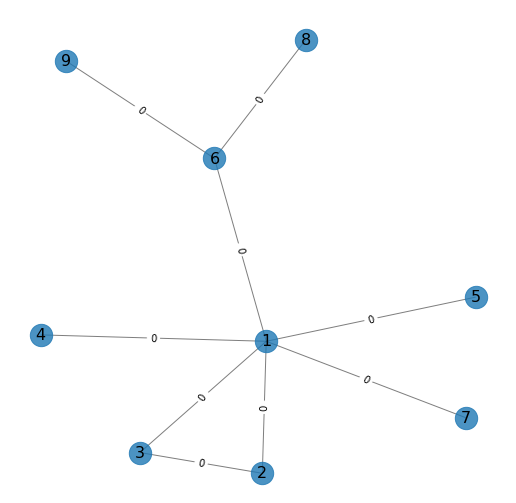

In [65]:
draw_graph(M)

### Теперь какой-нибудь пример графа, где есть и отрицательная кривизна.

In [36]:
# вариант с чтением из консоли, для тестирования наглядно
N = int(input("Введите количество вершин в графе: ")) # размер матрицы

M = np.zeros(shape = (N, N), dtype = float)
nums = list(map(float, input().split()))
for i in range(N):
    for j in range(N):
        M[i][j] = nums[i * N + j]
        #if M[i][j] != 0:
            #print(i, j, i * N + j)
print(M)

# 0  1  1  0  0     1  0  1  1  0     1  1  0  0  0     0  1  0  0  1     0  0  0  1  0    

##  0  1  1  1  0  0  0  0  0      1  0  1  0  0  0  0  0  0      1  1  0  0  0  0  0  0  0      1  0  0  0  1  1  1  1  1      0  0  0  1  0  0  0  0  0      0  0  0  1  0  0  0  0  0      0  0  0  1  0  0  0  0  0      0  0  0  1  0  0  0  0  0      0  0  0  1  0  0  0  0  0    

Введите количество вершин в графе: 9
 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 
[[0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]]


0 1 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ] 1.0 1.0
0 2 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.5 0.5 0.  0.  0.  0.  0.  0.  0. ] 1.0 1.0
0 3 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
0 4 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
0 5 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.33333333 0.         0.         0.         0.         0.
 0.         0.33333333 0.33333333] 1.0 1.0
0 6 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
1 0 [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ] [0.         0.166

0 2 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.5 0.5 0.  0.  0.  0.  0.  0.  0. ] 1.0 1.0
0 3 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
0 4 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
0 5 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [0.33333333 0.         0.         0.         0.         0.
 0.         0.33333333 0.33333333] 1.0 1.0
0 6 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] [1. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0 1.0
1 0 [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ] [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.         0.        ] 1.0 1.0
1 2 [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ] [0.5 0.5 0.  0.  

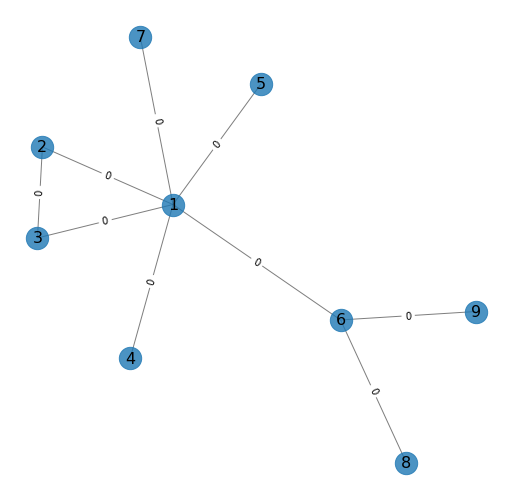

In [79]:
draw_graph(M)

'3.1.1'

In [ ]:
#  0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 